In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Análise de Dados: Vendas de Cursos Online

### Vamos utilizar uma base de dados de vendas de cursos online e iremos fazer: 
1. [calculo da receita total gerada pela venda dos cursos](#1)
2. [identificar o curso com o maior numero de vendas](#2)
3. [visualizar a distribuição das vendas ao longo do tempo através de gráficos](#3)

|variável|descrição|
|-|-|
|ID                     | Identificador único de cada curso vendido |
|Nome do Curso          | Nome do curso vendido na plataforma|
|Quantidade de Vendas   | Número de vendas realizadas para cada curso|
|Preço Unitário         | Preço unitário do curso|
|Data                   | Data da venda do curso|

In [45]:
df = pd.read_csv('dados.csv')
df.head(10)

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05
5,6,Arquitetura de Microserviços,12,89.9,2023-01-06
6,7,Banco de Dados SQL e NoSQL,18,79.9,2023-01-07
7,8,Segurança da Informação: Fundamentos,10,109.9,2023-01-08
8,9,Cloud Computing com AWS,22,99.9,2023-01-09
9,10,DevOps: Integração e Entrega Contínua,8,119.9,2023-01-10


In [287]:
df.dtypes, df.shape

(ID                        int64
 Nome do Curso            object
 Quantidade de Vendas      int64
 Preço Unitário          float64
 Data                     object
 total_receita           float64
 dtype: object,
 (25, 6))

### Explicação:
- Nesse inicio importei as bibliotecas pandas, matplotlib e seaborn.
- Coloquei as identificações de variaveis e suas descrições.
- Fiz a leitura dos dados e atribui à variavel "df"
- Mostrei apenas as 10 primeiras linhas
- Puxei os tipos de dados, quantas linhas tem (25 linhas), e quantas colunas temos (5) nessa base de dados para ter uma ideia com o que irei trabalhar.

# 1. calculo da receita total gerada pela venda dos cursos. <a name=1></a>

In [296]:
df['total_receita'] = df['Quantidade de Vendas'] * df['Preço Unitário']
df.head(10)

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data,total_receita
0,1,Introdução à Programação em Python,50,39.9,2023-01-01,1995.0
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02,1797.0
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03,1598.0
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04,1498.5
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05,1747.5
5,6,Arquitetura de Microserviços,12,89.9,2023-01-06,1078.8
6,7,Banco de Dados SQL e NoSQL,18,79.9,2023-01-07,1438.2
7,8,Segurança da Informação: Fundamentos,10,109.9,2023-01-08,1099.0
8,9,Cloud Computing com AWS,22,99.9,2023-01-09,2197.8
9,10,DevOps: Integração e Entrega Contínua,8,119.9,2023-01-10,959.2


In [48]:
receita_total = df['total_receita'].sum()
print(f'A receita total gerada pela venda dos cursos é :R$ {receita_total:.2f} reais')

A receita total gerada pela venda dos cursos é :R$ 32735.10 reais


- Com as 2 células acima descobri a receita total gerada pela venda dos cursos.
- Na primeira célula crie uma nova coluna no df chamada "total_receita" na qual fiz a multiplicação das colunas "Quantidade de Venda" * "Preço Unitário" adquirindo a receita pela venda total de cada curso.
- Na segunda célula atribui a uma variável chamada "receita_total" a soma da coluna "total_receita", para isso utilizei o ".sum()" e então printei a receita.

# 2. identificar o curso com o maior numero de vendas. <a name=2></a>

In [70]:
df.groupby('Nome do Curso')['Quantidade de Vendas'].sum().sort_values(ascending=False)

Nome do Curso
Introdução à Programação em Python               95
Desenvolvimento Web com HTML e CSS               75
Desenvolvimento Mobile com React Native          63
JavaScript Avançado: Frameworks e Bibliotecas    53
Cloud Computing com AWS                          37
Introdução ao Machine Learning                   37
Arquitetura de Microserviços                     30
Banco de Dados SQL e NoSQL                       30
Segurança da Informação: Fundamentos             15
DevOps: Integração e Entrega Contínua            14
Name: Quantidade de Vendas, dtype: int64

In [281]:
df.groupby('Nome do Curso').agg({'Quantidade de Vendas' : [('soma','sum'),('média','mean'),('minimo','min'),('maximo','max'),('desvio padrão','std')],
                                    'total_receita': [('soma','sum'),('média','mean'),('minimo','min'),('maximo','max'),('desvio padrão','std')]})


Quantidade de Vendas             \
                                                              soma      média   
Nome do Curso                                                                   
Arquitetura de Microserviços                                    30  10.000000   
Banco de Dados SQL e NoSQL                                      30  15.000000   
Cloud Computing com AWS                                         37  18.500000   
Desenvolvimento Mobile com React Native                         63  21.000000   
Desenvolvimento Web com HTML e CSS                              75  25.000000   
DevOps: Integração e Entrega Contínua                           14   7.000000   
Introdução ao Machine Learning                                  37  12.333333   
Introdução à Programação em Python                              95  47.500000   
JavaScript Avançado: Frameworks e Bibliotecas                   53  17.666667   
Segurança da Informação: Fundamentos                            15   7.500000   

                                                                           \
                                              minimo maximo desvio padrão   
Nome do Curso                                                               
Arquitetura de Microserviços                       8     12      2.000000   
Banco de Dados SQL e NoSQL                        12     18      4.242641   
Cloud Computing com AWS                           15     22      4.949747   
Desenvolvimento Mobile com React Native           18     25      3.605551   
Desenvolvimento Web com HTML e CSS                20     30      5.000000   
DevOps: Integração e Entrega Contínua              6      8      1.414214   
Introdução ao Machine Learning                    10     15      2.516611   
Introdução à Programação em Python                45     50      3.535534   
JavaScript Avançado: Frameworks e Bibliotecas     15     20      2.516611   
Segurança da Informação: Fundamentos               5     10      3.535534   

                                              total_receita               \
                                                       soma        média   
Nome do Curso                                                              
Arquitetura de Microserviços                         2697.0   899.000000   
Banco de Dados SQL e NoSQL                           2397.0  1198.500000   
Cloud Computing com AWS                              3696.3  1848.150000   
Desenvolvimento Mobile com React Native              4403.7  1467.900000   
Desenvolvimento Web com HTML e CSS                   4492.5  1497.500000   
DevOps: Integração e Entrega Contínua                1678.6   839.300000   
Introdução ao Machine Learning                       3696.3  1232.100000   
Introdução à Programação em Python                   3790.5  1895.250000   
JavaScript Avançado: Frameworks e Bibliotecas        4234.7  1411.566667   
Segurança da Informação: Fundamentos                 1648.5   824.250000   

                                                                             
                                               minimo  maximo desvio padrão  
Nome do Curso                                                                
Arquitetura de Microserviços                    719.2  1078.8    179.800000  
Banco de Dados SQL e NoSQL                      958.8  1438.2    338.986991  
Cloud Computing com AWS                        1498.5  2197.8    494.479772  
Desenvolvimento Mobile com React Native        1258.2  1747.5    252.028034  
Desenvolvimento Web com HTML e CSS             1198.0  1797.0    299.500000  
DevOps: Integração e Entrega Contínua           719.4   959.2    169.564206  
Introdução ao Machine Learning                  999.0  1498.5    251.409487  
Introdução à Programação em Python             1795.5  1995.0    141.067803  
JavaScript Avançado: Frameworks e Bibliotecas  1198.5  1598.0    201.077257  
Segurança da Informação: Fundamentos            549.5  1099.0    

### Explicação:
- Na célula acima utilizei um metodo de agrupamento chamado "groupby", agrupei pelas colunas "Nome do Curso" e "Quantidade de Vendas".
- Utilizei o ".sum()" novamente.
- Utilizei um método chamado ".sort_values()" para poder colocar a nossa lista em ordem descrescente utilizando o "ascending=False", o padrão é em ordem crescente.
- Com isso podemos afirmar que o curso de "Introdução à Programação em Python" é o que tem mais vendas.

### Explicação 2:
- com o "groupby" podemos usar o método "agg()" ou "aggregate()" e podemos passar algumas estátisticas para serem descritas como a soma, média, minimo, maximo e desvio padrão. Para passar essas descritivas utilizei as colunas "Quantidade de Vendas" e 'total_receita'

# 3. visualizar a distribuição das vendas ao longo do tempo através de gráficos. <a name=3></a>

C:\Users\Bruno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bruno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


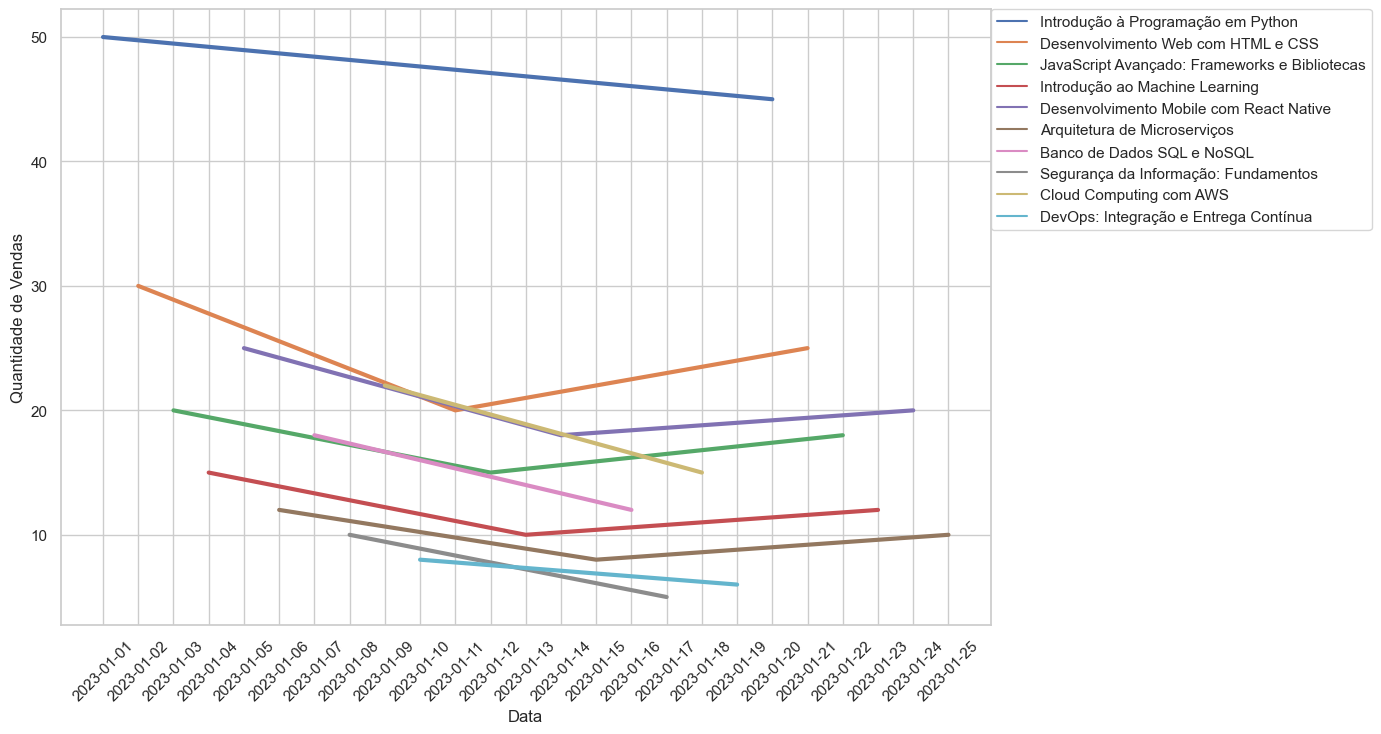

In [294]:
sns.set(style="whitegrid")
plt.rc('figure', figsize=(12,8))
plt.xticks(rotation=45)

sns.lineplot(x='Data', y='Quantidade de Vendas', hue='Nome do Curso', data=df, linewidth=3)
plt.savefig('analise_de_vendas')
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0)
plt.show()


### analisando o grafico podemos fazer algumas observações:
- O curso de "Introdução à Programação em PYTHON", foi vendido em apenas 2 datas e fica em 1º lugar em vendas.
- O curso de "Desenvolvimento Web com HTML e CSS" começa com um numero de 30 vendas e entaõ tem uma queda para 20 e logo volta para 25 vendas.
- O curso de "Cloud Computing com AWS" teve boas vendas mas teve uma queda.
- O curso de "DevOps: Integração e Entrega Contínua" teve poucas vendas e ainda teve uma pequena queda.

### Explicação:
- Primeiro coloquei um um tema de grid branco para melhorar na visualização do gráfico, para isso utilizei o "sns.set(style='whitegrid')"
- Com o "plt.rc()" ajustei o tamanho que irá ser exibido o gráfico e com o "plt.xticks" alterei a rotação do eixo X para as datas ficarem legiveis.
- Resolvi utilizar um gráfico de linhas, então usei o "sns.lineplot" no eixo X coloquei a coluna "Data", no eixo Y coloquei "Quantidade de Vendas" e para ordenar coloquei no "hue" a coluna "Nome do Curso" e aumentei a grossura da linha para melhorar a visibilidade.
- com o "plt.savefig()" eu salvo o grafico em um arquivo png.
- Com o "plt.legend" ajustei a caixa de legenda para direita fora do gráfico e utilizei o "plt.show()" para plotar o gráfico.

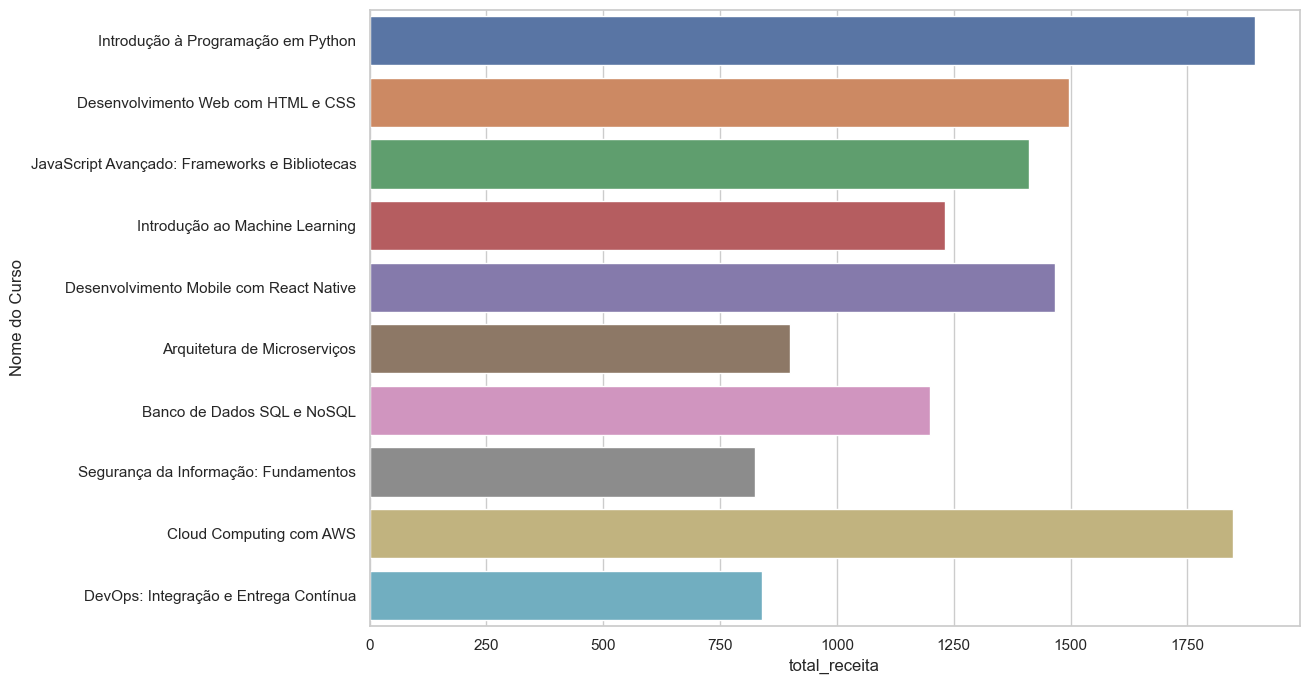

In [262]:
plt.rc('figure', figsize=(12,8))
sns.barplot(x='total_receita', y='Nome do Curso', data=df, errorbar=None)
plt.savefig('comparacao_vendas')
plt.show()

### Analisando o gráfico acima podemos tirar algumas observações:
- O curso de "Introdução à Programação em Python" ser o 1º em vendas, quase é passado no fator "aquisição de receita" pelo curso de "Cloud Computing com AWS".
- O curso de "Cloud Computing com AWS" tendo poucas vendas ainda fica em 2º lugar no fator "aquisição de receita".

### Explicação:
- Resolvi plotar um gráfico de barras para ver uma comparação de receita adquirida por cada curso.